# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#calling weather api

url= "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='

#lists to store data
data_citynames= []
data_lat=[]
data_lng=[]
data_temp=[]
data_windspeed=[]
data_humidity=[]
data_cloudiness=[]
data_date=[]
data_country=[]

count=1

print('_ _ _ _ _')
print('Beginning Data Retrival Process')
print('_ _ _ _ _')

for city in cities:
    count +=1
    try:
        response=requests.get(query_url + city).json()
        print (f'#{count}:{city}')
        

        data_citynames.append(response['name'])
        data_lat.append(response['coord']['lat'])
        data_lng.append(response['coord']['lon'])
        data_temp.append(response['main']['temp_max'])
        data_humidity.append(response['main']['humidity'])
        data_cloudiness.append(response['clouds']['all'])
        data_windspeed.append(response['wind']['speed'])
        data_country.append(response['sys']['country'])
        data_date.append(response['dt'])
    
    except:
        print (f"{city} not found")


_ _ _ _ _
Beginning Data Retrival Process
_ _ _ _ _
#2:piro
#3:yellowknife
#4:clyde river
#5:bredasdorp
#6:severo-kurilsk
#7:fairbanks
#8:punta arenas
#9:cabra
#10:dzaoudzi
#11:esperantina
#12:port alfred
#13:new norfolk
#14:marcona
marcona not found
#15:sentyabrskiy
sentyabrskiy not found
#16:mar del plata
#17:ilulissat
#18:shubarkuduk
#19:lulea
#20:kaeo
#21:narsaq
#22:eureka
#23:komsomolskiy
#24:rawson
#25:ozgon
ozgon not found
#26:barentsburg
barentsburg not found
#27:jamestown
#28:bluff
#29:lorengau
#30:puerto ayora
#31:torbay
#32:ahipara
#33:sebastian
#34:tukums
#35:port-gentil
#36:sistranda
#37:kahului
#38:albany
#39:taoudenni
#40:kogon
#41:bengkulu
#42:ostrovnoy
#43:umm lajj
#44:provideniya
#45:georgetown
#46:hilo
#47:ushuaia
#48:geraldton
#49:rikitea
#50:raudeberg
#51:dikson
#52:karakendzha
karakendzha not found
#53:iqaluit
#54:hermanus
#55:kuche
kuche not found
#56:tasiilaq
#57:mataura
#58:meyungs
meyungs not found
#59:cairns
#60:atuona
#61:poole
#62:saint-georges
#63:ribeira 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#create a dictionary with the lists to create a data frame
dictionary_forDF= {
    'City': data_citynames,
    'Lat': data_lat,
    'Lng':data_lng,
    'Max Temp':data_temp,
    'Humidity':data_humidity,
    'Cloudiness':data_cloudiness,
    'Wind Speed':data_windspeed,
    'Country':data_country,
    'Date':data_date
}

weather_df= pd.DataFrame(dictionary_forDF)

weather_df.to_csv(output_data_file, index= False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Piro,25.3333,84.4167,81.41,83,7,3.94,IN,1632063667
1,Yellowknife,62.4560,-114.3525,41.52,100,75,9.22,CA,1632063380
2,Clyde River,70.4692,-68.5914,30.45,63,95,5.88,CA,1632063668
3,Bredasdorp,-34.5322,20.0403,69.28,54,5,11.41,ZA,1632063668
4,Severo-Kuril'sk,50.6789,156.1250,51.04,98,100,12.71,RU,1632063386


In [37]:
#we can get the statistical summary table
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.958813,20.807365,67.170446,67.162210,55.190731,8.225365,1.632064e+09
std,33.546680,88.874541,18.475827,22.584059,39.242711,5.214942,9.690668e+01
min,-54.800000,-175.200000,17.200000,6.000000,0.000000,0.000000,1.632063e+09
25%,-8.466700,-54.916700,52.210000,57.000000,13.000000,4.000000,1.632064e+09
50%,24.687700,25.899400,70.410000,72.000000,66.000000,7.760000,1.632064e+09
75%,49.144700,95.321400,80.920000,84.000000,97.000000,11.450000,1.632064e+09
max,78.218600,178.416700,112.770000,100.000000,100.000000,28.770000,1.632064e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
weather_df= weather_df.sort_values(['Humidity'])
weather_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
546,Myitkyina,25.3833,97.4000,73.81,99,23,0.96,MM,1632063922
49,Mataura,-46.1927,168.8643,41.49,99,15,2.75,NZ,1632063688
1,Yellowknife,62.4560,-114.3525,41.52,100,75,9.22,CA,1632063380
12,Mar del Plata,-38.0023,-57.5575,57.22,100,75,14.97,AR,1632063550
133,Orange Cove,36.6244,-119.3137,63.72,100,1,5.75,US,1632063731


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

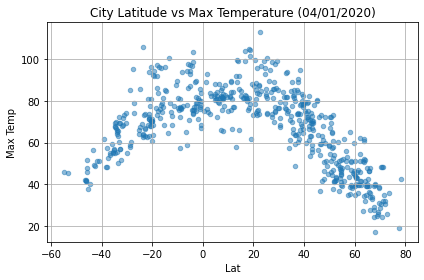

Ecuador's latitude is 0, from this graph we can see that temperatures around 0 (latitude = +/- 20) are more consistent and on the hotter side, as we move further away from the Ecuator it gets colder on both directions. 


In [46]:
#plot for City Latitude vs Max Temperature on 4/01/20
on_date= '(04/01/2020)'

weather_df.plot.scatter(
    x='Lat',y= 'Max Temp', grid= True, alpha= 0.5, xlabel="Latitude", ylabel= "Max Temperature",
    title= f'City Latitude vs Max Temperature {on_date}'
)

plt.tight_layout()
plt.show()

print("Ecuador's latitude is 0, from this graph we can see that temperatures around 0 (latitude = +/- 20) are more consistent and on the hotter side, as we move further away from the Ecuator it gets colder on both directions. ") 




## Latitude vs. Humidity Plot

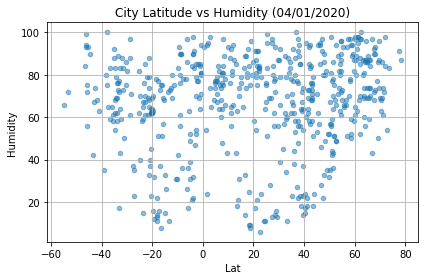

From this graph we can see that Humidity does not have a pattern as it gets closer to the Ecuator.


In [48]:
#plot for City Latitude vs Humidity on 4/01/20

weather_df.plot.scatter(
    x='Lat',y= 'Humidity', grid= True, alpha= 0.5, xlabel="Latitude", ylabel= "Humidity",
    title= f'City Latitude vs Humidity {on_date}'
)

plt.tight_layout()
plt.show()

print("From this graph we can see that Humidity does not have a pattern as it gets closer to the Ecuator.")

## Latitude vs. Cloudiness Plot

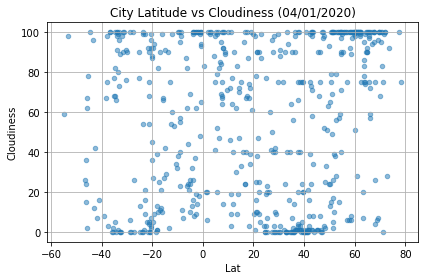

From this graph we cannot see any patterns of Cloudiness as we get closer to the Ecuator


In [50]:
#plot for City Latitude vs Cloudiness on 4/01/20

weather_df.plot.scatter(
    x='Lat',y= 'Cloudiness', grid= True, alpha= 0.5, xlabel="Latitude", ylabel= "Cloudiness",
    title= f'City Latitude vs Cloudiness {on_date}'
)

plt.tight_layout()
plt.show()

print("From this graph we cannot see any patterns of Cloudiness as we get closer to the Ecuator")

## Latitude vs. Wind Speed Plot

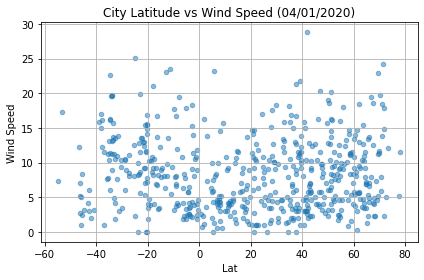

From this graph we cannot see any patterns of Wind speed as we get closer to the Ecuator


In [54]:
#plot for City Latitude vs Wind Speed on 4/01/20
on_date= '(04/01/2020)'

weather_df.plot.scatter(
    x='Lat',y= 'Wind Speed', grid= True, alpha= 0.5, xlabel="Latitude", ylabel= "Wind Speed",
    title= f'City Latitude vs Wind Speed {on_date}'
)

plt.tight_layout()
plt.show()

print("From this graph we cannot see any patterns of Wind speed as we get closer to the Ecuator")

## Linear Regression

In [62]:
northernH_df = weather_df[weather_df['Lat']>0]
southernH_df = weather_df[weather_df['Lat']<0]

#The next graphs are specific for the northen or southern hemisphere so we split at latitude = 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

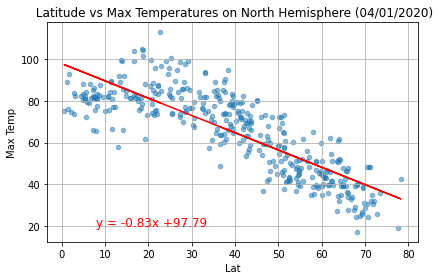

In [68]:
northernH_df.plot.scatter(
    x='Lat',y= 'Max Temp', grid= True, alpha= 0.5, xlabel="Latitude", ylabel= "Max Temperature", title=f' Latitude vs Max Temperatures on North Hemisphere {on_date}'
)

(slope, intercept, rvalue, _, _) = linregress(northernH_df['Lat'],northernH_df['Max Temp'])
fit = slope*northernH_df['Lat']+intercept
plt.plot(northernH_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[8,20], color = 'red', fontsize = 12)


plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


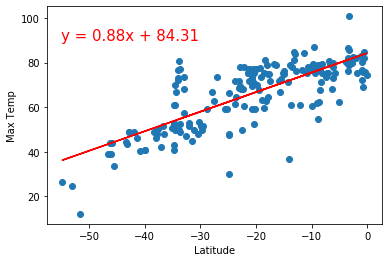

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


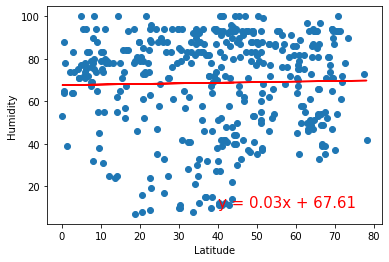

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


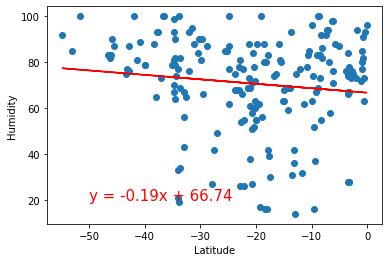

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


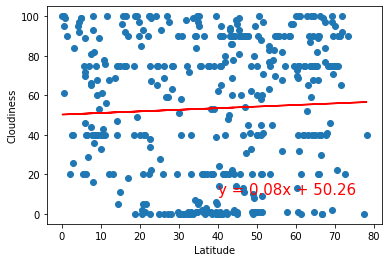

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


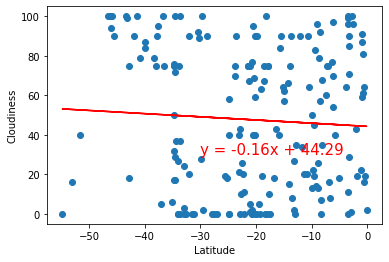

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


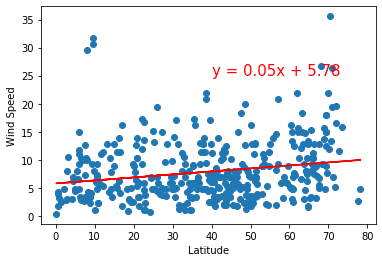

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


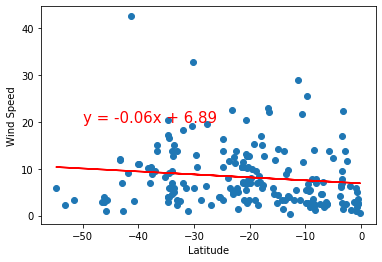